# FLIGHT PRICE PREDICTION

Flight ticket prices can be something hard to guess, today we might see a price, check out the price of the same flight tomorrow, it will be a different story. We might have often heard travellers saying that flight ticket prices are so unpredictable. Here you will be provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_df = pd.read_excel('Data_Train.xlsx')
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [3]:
train_df.shape

(10683, 11)

##### We have 10683 rows and 11 columns.

In [4]:
train_df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

### About the Columns

Airline - The name of Airline. 

Date_of_Journey - Date of the Journey.

Source - The source from which the service begins.

Destination - The destination where the service ends.

Route - The route taken by the flight to reach the destination.
       
Dep_Time - The time when journey starts from the source.

Arrival_Time - Time of arrival at the destination.

Duration - Total duration of the flight.

Total_Stops - Total stops between the source and destination.
       
Additional_Info - Additional information about the flight.

Price - The price of the Ticket.

In [5]:
train_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

##### In the given dataset only one column is an integer others are the object.

In [6]:
train_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

##### There are only two null values in a given dataset. 

In [7]:
train_df.dropna(inplace=True)

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


##### Now we dont have any null values. We have the information about our dataset which shows number of rows and columns and Memory usage by dataet.

In [9]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [10]:
train_df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
27h 55m      1
32h 20m      1
47h          1
47h 40m      1
37h 10m      1
Name: Duration, Length: 368, dtype: int64

In [11]:
train_df['Day_journey'] = pd.to_datetime(train_df["Date_of_Journey"]).dt.day

In [12]:
train_df['Month_journey'] = pd.to_datetime(train_df["Date_of_Journey"]).dt.month

In [13]:
train_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_journey,Month_journey
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


In [14]:
train_df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [15]:
train_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_journey,Month_journey
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,4,9
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,3,1


In [16]:
train_df['Dep_hour'] = pd.to_datetime(train_df["Dep_Time"]).dt.hour
train_df["Dep_min"] = pd.to_datetime(train_df['Dep_Time']).dt.minute

In [17]:
train_df.drop(['Dep_Time'],axis=1,inplace=True)

In [18]:
train_df

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_journey,Month_journey,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,5,1,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,6,9,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,5,12,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,3,1,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,22:25,2h 30m,non-stop,No info,4107,4,9,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,23:20,2h 35m,non-stop,No info,4145,27,4,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,11:20,3h,non-stop,No info,7229,27,4,8,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,14:10,2h 40m,non-stop,No info,12648,3,1,11,30


In [19]:
train_df['Arrival_hour'] = pd.to_datetime(train_df.Arrival_Time).dt.hour
train_df['Arrival_min'] = pd.to_datetime(train_df.Arrival_Time).dt.minute

train_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [20]:
train_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_journey,Month_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,3,1,11,30,14,10


In [21]:
train_df['Duration'] = train_df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [22]:
train_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day_journey,Month_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,1,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,6,9,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,5,12,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,150,non-stop,No info,4107,4,9,19,55,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,4145,27,4,20,45,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,180,non-stop,No info,7229,27,4,8,20,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,160,non-stop,No info,12648,3,1,11,30,14,10


In [23]:
train_df.drop(['Route','Additional_Info'],axis=1,inplace=True)

### Data Analysis and Visualization

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'IndiGo'),
  Text(1, 0, 'Air India'),
  Text(2, 0, 'Jet Airways'),
  Text(3, 0, 'SpiceJet'),
  Text(4, 0, 'Multiple carriers'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'Vistara'),
  Text(7, 0, 'Air Asia'),
  Text(8, 0, 'Vistara Premium economy'),
  Text(9, 0, 'Jet Airways Business'),
  Text(10, 0, 'Multiple carriers Premium economy'),
  Text(11, 0, 'Trujet')])

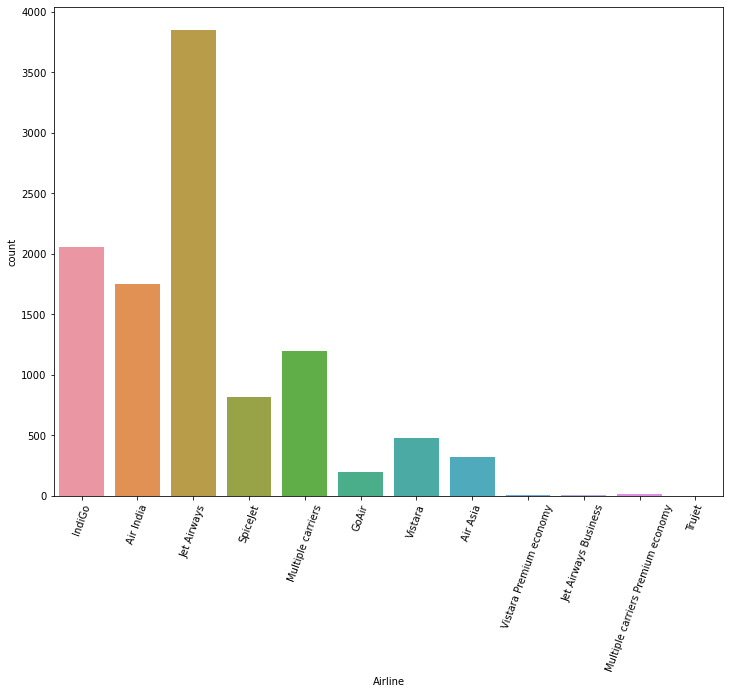

In [24]:
plt.figure(figsize=(12,9))
sns.countplot(x = 'Airline',data=train_df,)
plt.xticks(rotation = 70)

##### From the above plot we can say that Jet Airways has the most preffered Airline,followed by Indigo and Air India.

<AxesSubplot:xlabel='Source', ylabel='count'>

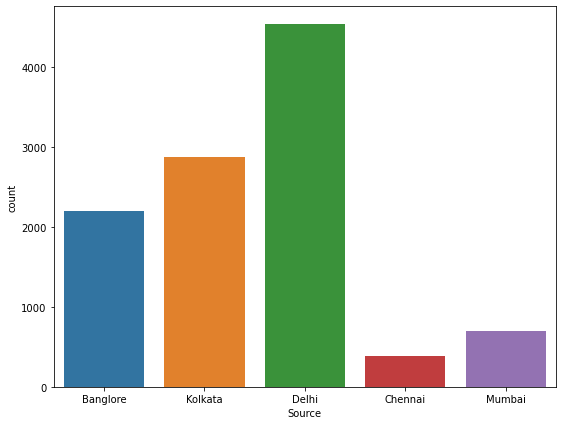

In [25]:
plt.figure(figsize=(9,7))
sns.countplot(x = 'Source',data=train_df)

##### Above plot says that maximum flights are take off from Delhi and the minimum flights are take off from Chennai. 

<AxesSubplot:xlabel='Destination', ylabel='count'>

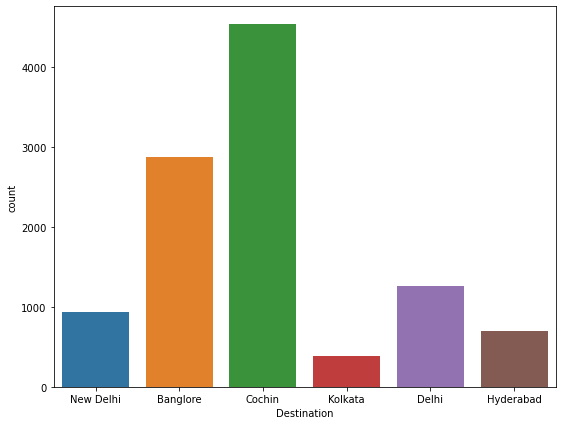

In [26]:
plt.figure(figsize=(9,7))
sns.countplot(x = 'Destination',data=train_df)

##### From above plot wwe can see that maximum flights are land in Cochin and Kolkata has lowest number of receiving flights.

<AxesSubplot:xlabel='Duration', ylabel='Price'>

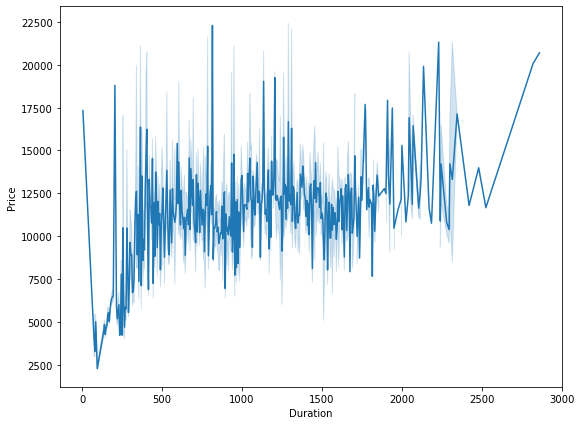

In [27]:
plt.figure(figsize=(9,7))
sns.lineplot(x = 'Duration',y = 'Price',data=train_df)

##### From above plot we can say that more Duration of flight cost the more price for flight.

<AxesSubplot:xlabel='Total_Stops', ylabel='Price'>

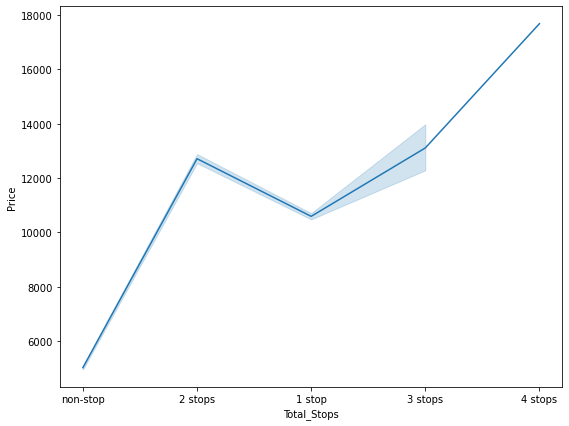

In [28]:
plt.figure(figsize=(9,7))
sns.lineplot(x = 'Total_Stops',y = 'Price',data=train_df)

##### Above plot shows that more is the stops for flights highrst is the Price .

<AxesSubplot:xlabel='Day_journey', ylabel='Price'>

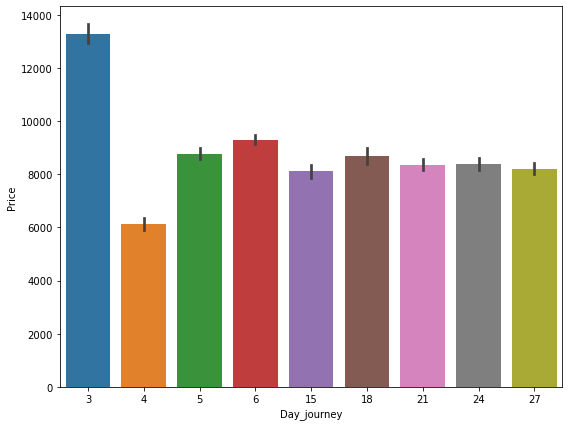

In [29]:
plt.figure(figsize=(9,7))
sns.barplot(x= 'Day_journey',y = 'Price',data=train_df)

##### At the 3rd day of the month price is highest.

<AxesSubplot:xlabel='Month_journey', ylabel='Price'>

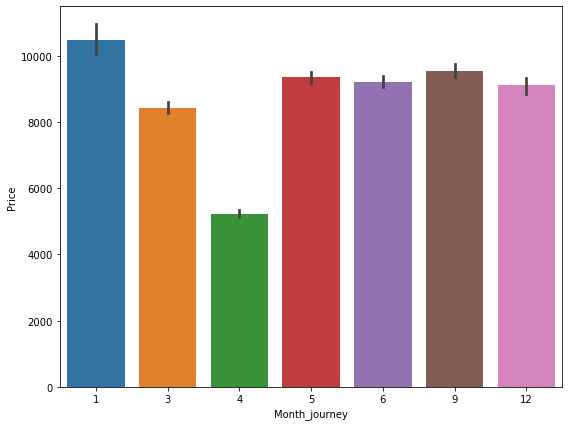

In [30]:
plt.figure(figsize=(9,7))
sns.barplot(x = 'Month_journey',y = 'Price',data=train_df)

##### Price are higher in the month of January.

<AxesSubplot:xlabel='Dep_hour', ylabel='Price'>

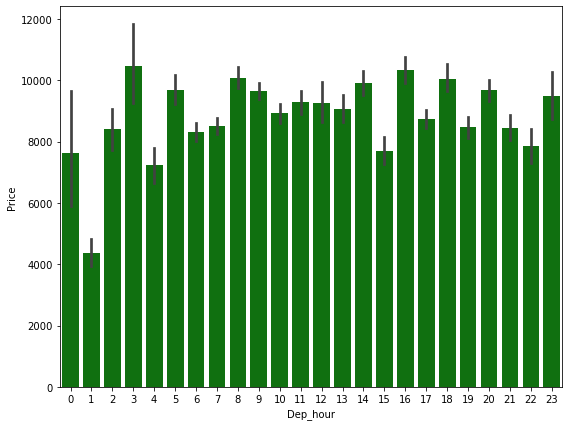

In [31]:
plt.figure(figsize=(9,7))
sns.barplot(x = 'Dep_hour',y = 'Price',data=train_df,color='g')

<AxesSubplot:xlabel='Dep_min', ylabel='Price'>

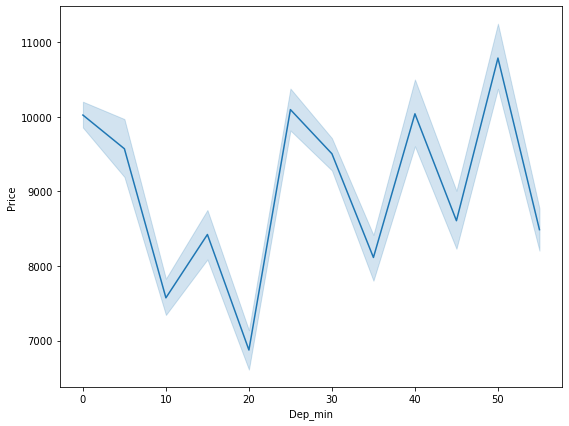

In [32]:
plt.figure(figsize=(9,7))
sns.lineplot(x = 'Dep_min',y = 'Price',data=train_df)

##### Pricew of the flight goes up-down as the departure minutes of flights goes up-down.

<AxesSubplot:xlabel='Arrival_hour', ylabel='Price'>

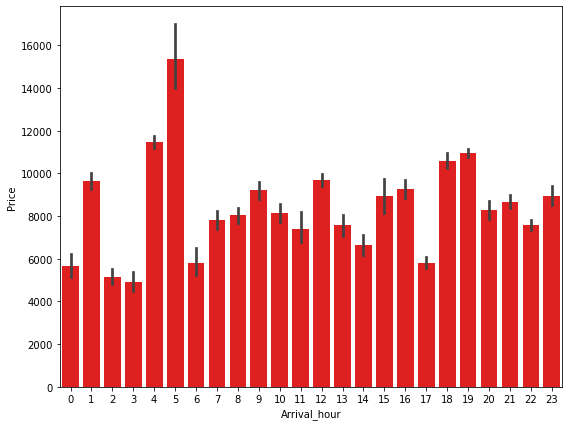

In [33]:
plt.figure(figsize=(9,7))
sns.barplot(x = 'Arrival_hour',y = 'Price',data=train_df,color='r')

##### At Arrival hour 5 price of the flight is highest.

<AxesSubplot:xlabel='Arrival_min', ylabel='Price'>

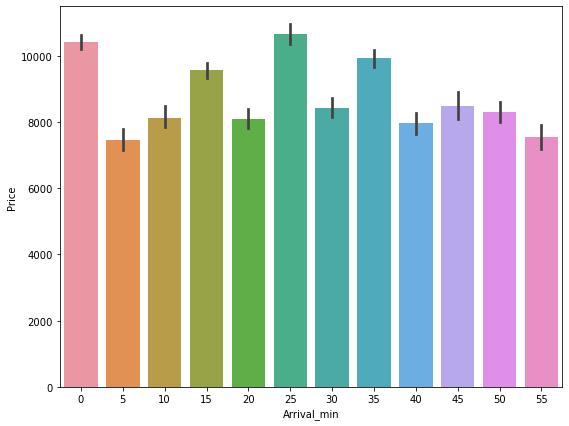

In [34]:
plt.figure(figsize=(9,7))
sns.barplot(x = 'Arrival_min',y = 'Price',data=train_df)

##### At the Arrival minute 25 price of the flight is highest.

### Description

In [35]:
train_df.describe()

,Duration,Price,Day_journey,Month_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
count,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000,10682.000000
mean,643.020502,9087.214567,12.682925,5.534731,12.491013,24.409287,13.349186,24.690601
std,507.830133,4611.548810,8.803800,2.987626,5.748820,18.767801,6.859317,16.506808
min,5.000000,1759.000000,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,170.000000,5277.000000,5.000000,3.000000,8.000000,5.000000,8.000000,10.000000
50%,520.000000,8372.000000,6.000000,5.000000,11.000000,25.000000,14.000000,25.000000
75%,930.000000,12373.000000,21.000000,6.000000,18.000000,40.000000,19.000000,35.000000
max,2860.000000,79512.000000,27.000000,12.000000,23.000000,55.000000,23.000000,55.000000


<AxesSubplot:>

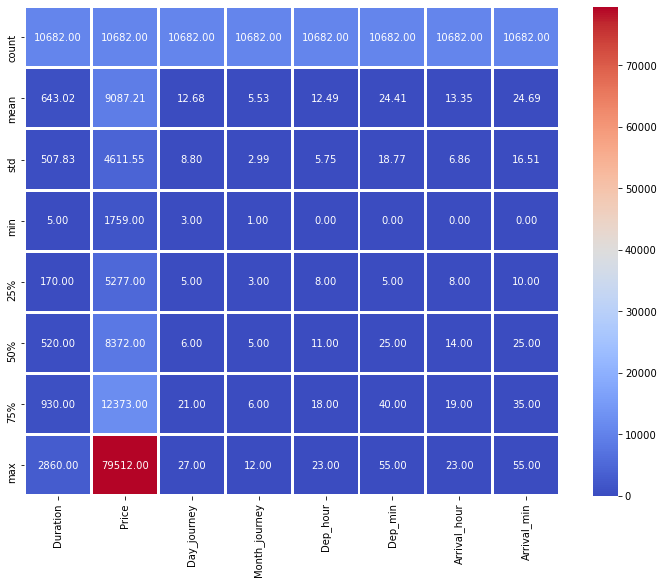

In [36]:
plt.figure(figsize=(12,9))
sns.heatmap(train_df.describe(),annot=True,linewidths=2,fmt='.2f',cmap='coolwarm')

##### From the heatmap we can find the Mean,Standard deviation, Maximum value,Minimum value for each column.

### Outcome of Description

##### Description of Flight dataset helps us to clean the data.

Duration - 1.Mean = 643.03, 2.Std = 507.83, 3.Min = 5, Max = 2860

Price - 1.Mean = 9087.21, 2.Std = 4611.55, Min = 1759, Max = 79512

Day_journey - 1.Mean = 12.68, 2.Std = 8.80, 3.Min = 3, Max = 27

Month Journey - 1.Mean = 5.53, 2.Std = 2.99, 3.Min = 1, Max = 12

Dep_hour - 1.Mean = 12.49, 2.Std = 5.75, 3.Min = 0, Max = 23

dep_min - 1.Mean = 24.42, 2.Std = 18.77, 3.Min = 0, Max = 55

Arrival_hour - 1.Mean = 13.35, 2.Std = 6.86, 3.Min = 0, Max = 23

Arrival_min - 1.Mean = 24.46, 2.Std = 16.51, 3.Min = 0, Max = 55


### Correlation

In [37]:
train_df.corr()

,Duration,Price,Day_journey,Month_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
Duration,1.000000,0.506480,-0.038360,0.055136,0.002088,-0.019099,0.051531,-0.069663
Price,0.506480,1.000000,-0.165448,0.010705,0.006799,-0.024458,0.024244,-0.086155
Day_journey,-0.038360,-0.165448,1.000000,-0.264896,-0.002301,-0.016433,-0.002176,-0.021423
Month_journey,0.055136,0.010705,-0.264896,1.000000,0.028189,0.002136,-0.004329,-0.025786
Dep_hour,0.002088,0.006799,-0.002301,0.028189,1.000000,-0.024745,0.005180,0.067911
Dep_min,-0.019099,-0.024458,-0.016433,0.002136,-0.024745,1.000000,0.043122,-0.017597
Arrival_hour,0.051531,0.024244,-0.002176,-0.004329,0.005180,0.043122,1.000000,-0.154363
Arrival_min,-0.069663,-0.086155,-0.021423,-0.025786,0.067911,-0.017597,-0.154363,1.000000


<AxesSubplot:>

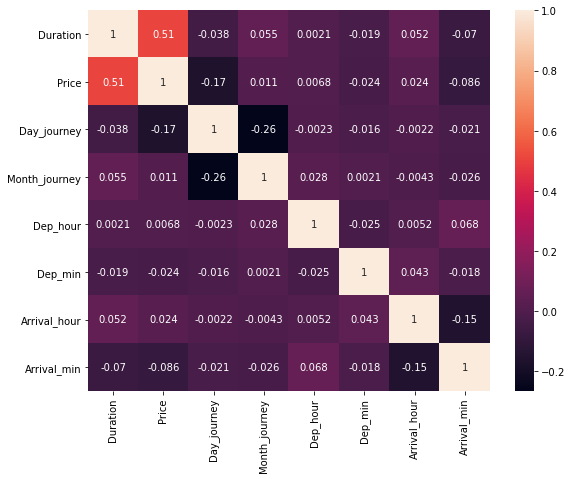

In [38]:
plt.figure(figsize=(9,7))
sns.heatmap(train_df.corr(),annot=True)

##### From above heatmap we can see that, some columns are positively correlated  and the others are negatively corretaed. Duration and Price are positively correlated with 51 percent

In [39]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Airline        10682 non-null  object
 1   Source         10682 non-null  object
 2   Destination    10682 non-null  object
 3   Duration       10682 non-null  int64 
 4   Total_Stops    10682 non-null  object
 5   Price          10682 non-null  int64 
 6   Day_journey    10682 non-null  int64 
 7   Month_journey  10682 non-null  int64 
 8   Dep_hour       10682 non-null  int64 
 9   Dep_min        10682 non-null  int64 
 10  Arrival_hour   10682 non-null  int64 
 11  Arrival_min    10682 non-null  int64 
dtypes: int64(8), object(4)
memory usage: 1.3+ MB


##### We dont have any null values in Flight dataset.

In [40]:
cat_columns = []
for i in train_df.dtypes.index:
    if train_df[i].dtypes == 'object':
        cat_columns.append(i)
cat_columns

['Airline', 'Source', 'Destination', 'Total_Stops']

In [41]:
non_cat_columns = []
for i in train_df.dtypes.index:
    if train_df[i].dtypes != object:
        non_cat_columns.append(i)
non_cat_columns

['Duration',
 'Price',
 'Day_journey',
 'Month_journey',
 'Dep_hour',
 'Dep_min',
 'Arrival_hour',
 'Arrival_min']

### Data Cleaning

#### Skewness

In [42]:
train_df.skew()

Duration         0.861411
Price            1.812405
Day_journey      0.367212
Month_journey    0.629556
Dep_hour         0.112924
Dep_min          0.167234
Arrival_hour    -0.370146
Arrival_min      0.110945
dtype: float64

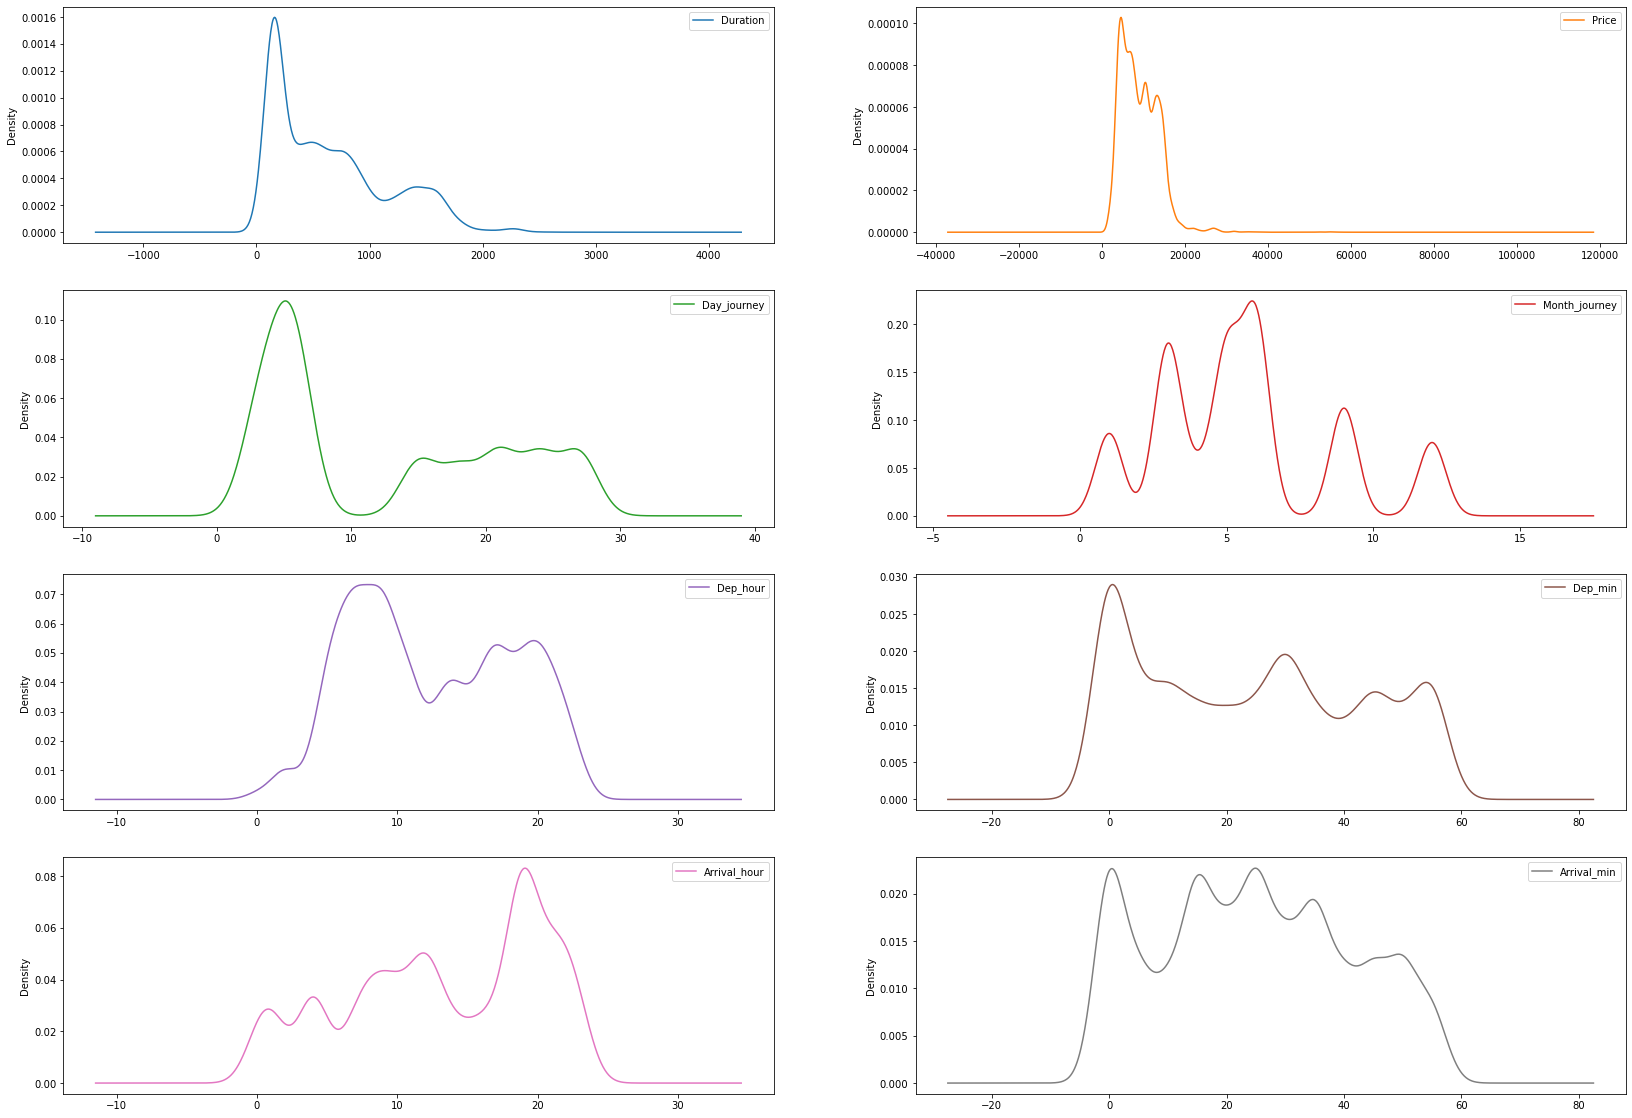

In [43]:
train_df.plot(kind = 'density',subplots = True, layout = (4,2),figsize=(28,20),sharex = False)
plt.show()

##### We can see the skewness in train df  data.

### Data Conversion

In [44]:
from sklearn.preprocessing import LabelEncoder

lec = LabelEncoder()

In [45]:
for i in train_df.columns:
    if train_df[i].dtypes == object:
        train_df[i] = lec.fit_transform(train_df[i].values.reshape(-1,1))

In [46]:
train_df

,Airline,Source,Destination,Duration,Total_Stops,Price,Day_journey,Month_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,3,0,5,170,4,3897,24,3,22,20,1,10
1,1,3,0,445,1,7662,5,1,5,50,13,15
2,4,2,1,1140,1,13882,6,9,9,25,4,25
3,3,3,0,325,0,6218,5,12,18,5,23,30
4,3,0,5,285,0,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,3,0,150,4,4107,4,9,19,55,22,25
10679,1,3,0,155,4,4145,27,4,20,45,23,20
10680,4,0,2,180,4,7229,27,4,8,20,11,20
10681,10,0,5,160,4,12648,3,1,11,30,14,10


### Checking Outliers

In [47]:
df_cat_columns = train_df[cat_columns]
df_cat_columns

,Airline,Source,Destination,Total_Stops
0,3,0,5,4
1,1,3,0,1
2,4,2,1,1
3,3,3,0,0
4,3,0,5,0
...,...,...,...,...
10678,0,3,0,4
10679,1,3,0,4
10680,4,0,2,4
10681,10,0,5,4


In [48]:
df_non_cat_columns = train_df[non_cat_columns]
df_non_cat_columns

,Duration,Price,Day_journey,Month_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,170,3897,24,3,22,20,1,10
1,445,7662,5,1,5,50,13,15
2,1140,13882,6,9,9,25,4,25
3,325,6218,5,12,18,5,23,30
4,285,13302,3,1,16,50,21,35
...,...,...,...,...,...,...,...,...
10678,150,4107,4,9,19,55,22,25
10679,155,4145,27,4,20,45,23,20
10680,180,7229,27,4,8,20,11,20
10681,160,12648,3,1,11,30,14,10


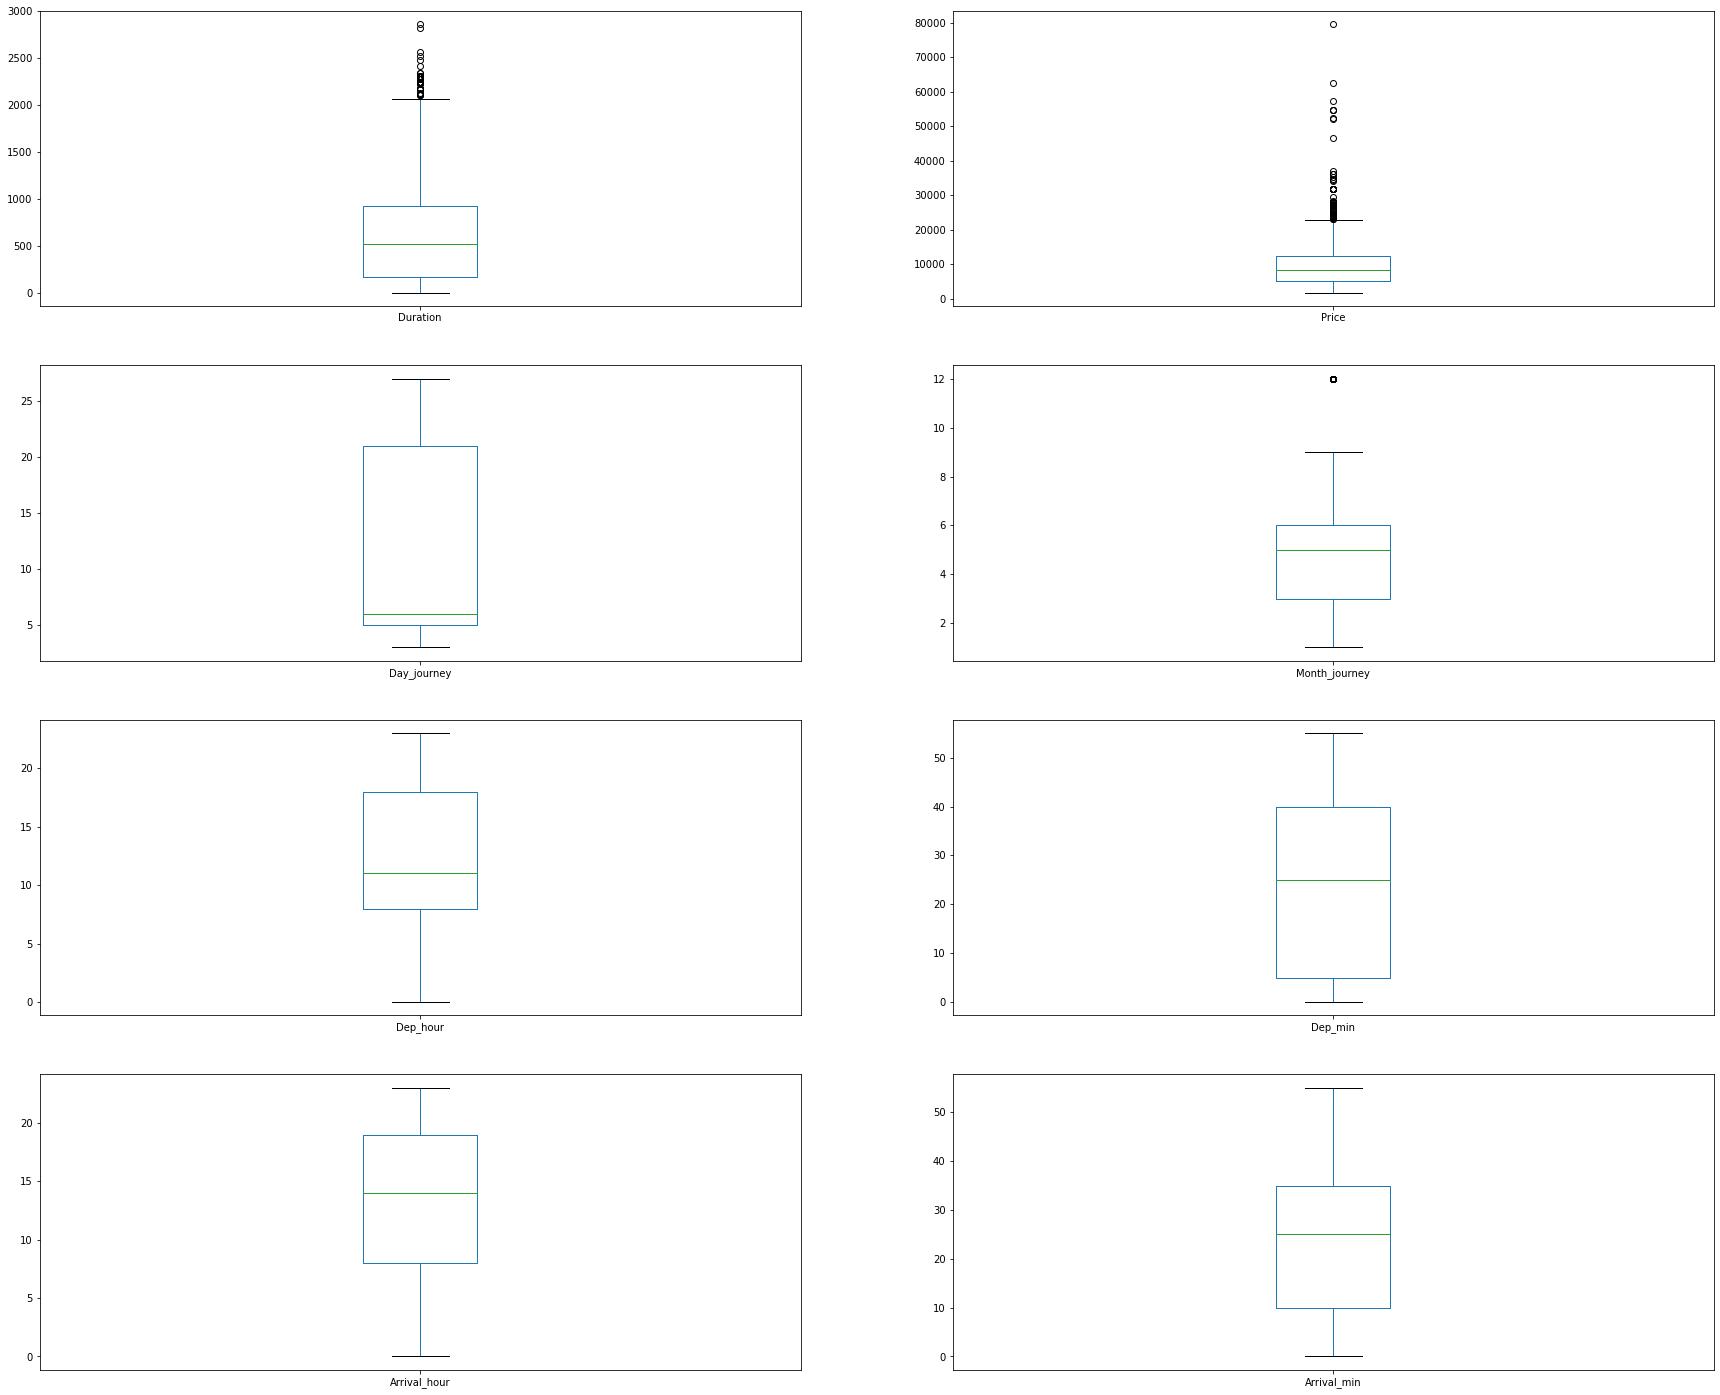

In [49]:
df_non_cat_columns.plot(kind = 'box',subplots = True,layout = (4,2),figsize=(30,25))
plt.show()

#### We can see Outliers present in;

Duration

Price

Month_journey

### Removing Outliers

##### Z Score Technique

In [50]:
from scipy.stats import zscore

z = np.abs(zscore(train_df))
z.shape

(10682, 12)

In [51]:
train_df = train_df[(z<3).all(axis=1)]
train_df.shape

(10521, 12)

### Percentage Data Loss

In [52]:
percentage_data_loss = (10682-10521)/10682*100
percentage_data_loss

1.507208387942333

## Test Data

In [53]:
test_df = pd.read_excel('Test_set.xlsx')
test_df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info
...,...,...,...,...,...,...,...,...,...,...
2666,Air India,6/06/2019,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info
2667,IndiGo,27/03/2019,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info
2668,Jet Airways,6/03/2019,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info
2669,Air India,6/03/2019,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info


In [54]:
test_df.shape

(2671, 10)

##### We have 2671 rows and 10 columns in test data os flight prediction.

In [55]:
test_df.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
dtype: object

##### We have all the object values in test dataset.

In [56]:
test_df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

##### There is no null values in test dataset of flight.

In [57]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


##### We can see the information about our test dataset.

### Exploratory Data Analysis

In [58]:
test_df['Day_journey'] = pd.to_datetime(test_df["Date_of_Journey"]).dt.day
test_df['Month_journey'] = pd.to_datetime(test_df["Date_of_Journey"]).dt.month

In [59]:
test_df.drop('Date_of_Journey',axis=1,inplace=True)

In [60]:
test_df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Day_journey,Month_journey
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,6,6
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,5,12
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,21,5
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,21,5
4,Air Asia,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,24,6
...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,20:30,20:25 07 Jun,23h 55m,1 stop,No info,6,6
2667,IndiGo,Kolkata,Banglore,CCU → BLR,14:20,16:55,2h 35m,non-stop,No info,27,3
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,21:50,04:25 07 Mar,6h 35m,1 stop,No info,3,6
2669,Air India,Delhi,Cochin,DEL → BOM → COK,04:00,19:15,15h 15m,1 stop,No info,3,6


In [61]:
test_df['Dep_hour'] = pd.to_datetime(test_df["Dep_Time"]).dt.hour
test_df["Dep_min"] = pd.to_datetime(test_df['Dep_Time']).dt.minute

In [62]:
test_df['Arrival_hour'] = pd.to_datetime(test_df.Arrival_Time).dt.hour
test_df['Arrival_min'] = pd.to_datetime(test_df.Arrival_Time).dt.minute

test_df.drop(['Arrival_Time'],axis=1,inplace=True)

In [63]:
test_df['Duration'] = test_df['Duration'].str.replace('h','*60').str.replace(' ','+').str.replace('m','*1').apply(eval)

In [65]:
test_df.drop(['Dep_Time'],axis=1,inplace=True)

In [66]:
test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_journey,Month_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1435,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,395,1 stop,No info,3,6,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,915,1 stop,No info,3,6,4,0,19,15


In [67]:
Airline = test_df[['Airline']]
Airline = pd.get_dummies(Airline,drop_first=True)
Airline

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2666,1,0,0,0,0,0,0,0,0,0
2667,0,0,1,0,0,0,0,0,0,0
2668,0,0,0,1,0,0,0,0,0,0
2669,1,0,0,0,0,0,0,0,0,0


In [68]:
test_df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Day_journey,Month_journey,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,655,1 stop,No info,6,6,17,30,4,25
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,240,1 stop,No info,5,12,6,20,10,20
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1425,1 stop,In-flight meal not included,21,5,19,15,19,0
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,780,1 stop,No info,21,5,8,0,21,0
4,Air Asia,Banglore,Delhi,BLR → DEL,170,non-stop,No info,24,6,23,55,2,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1435,1 stop,No info,6,6,20,30,20,25
2667,IndiGo,Kolkata,Banglore,CCU → BLR,155,non-stop,No info,27,3,14,20,16,55
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,395,1 stop,No info,3,6,21,50,4,25
2669,Air India,Delhi,Cochin,DEL → BOM → COK,915,1 stop,No info,3,6,4,0,19,15


##### Now we have new test dataset with 2671 rows and 13 columns.